In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("studentperformance.csv")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [8]:
print(df.shape)

(1000, 8)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
# renaming names for ease of use 
df.columns = [
    "gender",
    "race",
    "parent_education",
    "lunch",
    "test_prep",
    "math_score",
    "reading_score",
    "writing_score"
]


# EDA

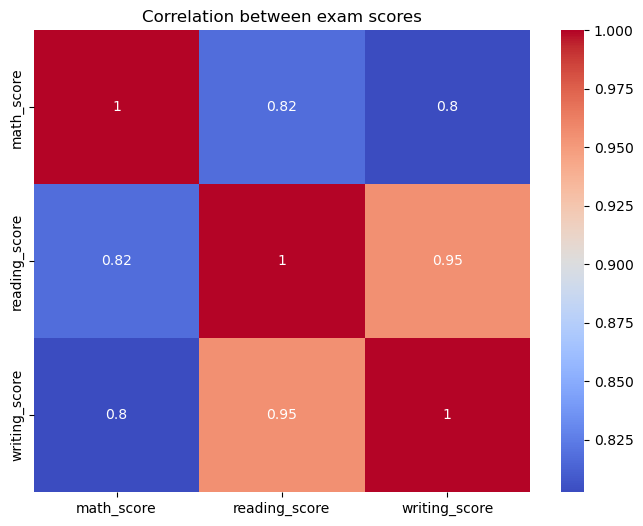

In [15]:
#Correlation heat map

plt.figure(figsize=(8,6))
sns.heatmap(df[["math_score","reading_score","writing_score"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation between exam scores")
plt.show()

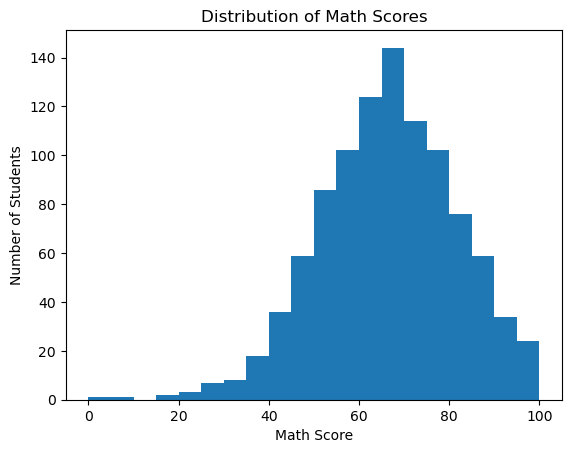

In [17]:
#math score distribution 


plt.hist(df["math_score"], bins=20)
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Math Scores")
plt.show()


In [20]:
# Convert Categorical Data to Numerical

df_encoded = pd.get_dummies(df,drop_first=True)

In [21]:
# Feature Selection

features = df_encoded.drop("math_score", axis=1)
target = df_encoded["math_score"]


# Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.25,
    random_state=42
)

# Model Training (Linear Regression)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Prediction

In [29]:
predicted_scores = model.predict(X_test)

print("Predicted Scores:", predicted_scores[:6])
print("Actul Scores:",y_test.values[:6])

Predicted Scores: [76.41555568 58.8353565  76.90737039 76.76003245 87.45400743 79.07262897]
Actul Scores: [91 53 80 74 84 81]


# Model Evaluation

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score

mes = mean_squared_error(y_test, predicted_scores)
r2 = r2_score(y_test, predicted_scores)

print(" mean squared error:",mes)
print("R2 score:",r2)

 mean squared error: 30.058114626720354
R2 score: 0.8778243107659014


# Predict Score for a New Student

In [36]:
# Example student data (encoded format)
sample_student = X_test.iloc[0].values.reshape(1, -1)

predicted_math_score = model.predict(sample_student)
print("Predicted Math Score:", predicted_math_score[0])


Predicted Math Score: 76.41555568380934


C:\Users\adithiyha\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
